In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import random
from collections import namedtuple
import utils

def deserialize(file):
	data_path = "./dane/"
	data = [np.array(line.strip().split(), dtype=np.float32) for line in open(data_path + file)]
	return np.array(data)

## Reading and displaying data

In [2]:
X = deserialize("ImageRawReduced.txt")
C = deserialize("ImageExpertReduced.txt").astype(np.int64)
rules = deserialize("ClassificationRules.txt").astype(np.int64)

print(X.shape, C.shape, rules.shape)

(3, 9350) (1, 9350) (266, 9350)


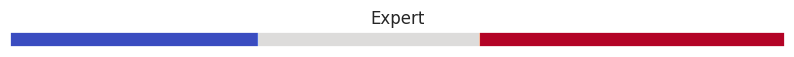

<AxesSubplot:>

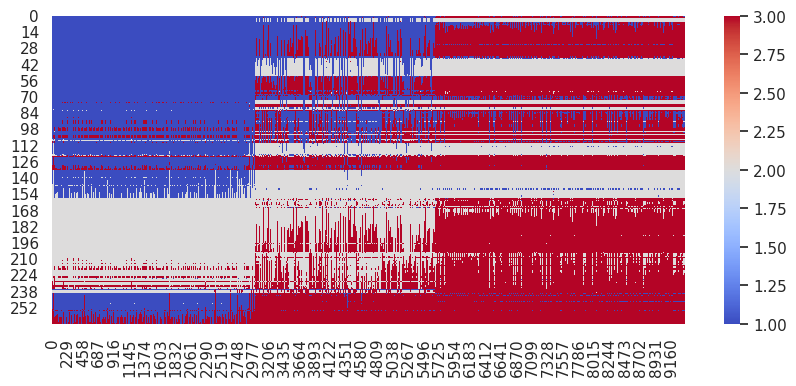

In [3]:
sns.set(rc={'figure.figsize':(10.2, 4)})
utils.heatbar(C, title="Expert")
sns.heatmap(rules, cmap="coolwarm")

## PBIL

In [4]:
def majority_classification(votes : np.array):
	return np.apply_along_axis(np.bincount, axis=0, arr=votes, minlength = 4).argmax(axis=0)

def classify(rule_subset : np.array):
	votes = rules[np.where(rule_subset == 1)]
	return majority_classification(votes)

def objective_function(rule_subset : np.array):
	predictions = classify(rule_subset)
	return sum(predictions == C[0])

In [5]:
State = namedtuple("State", ["leader", "distribution", "population"])

def initialize_distribution(chromosome):
	return np.full(chromosome, 0.5)

def sample(distribution):
	v = np.random.random(distribution.shape)
	return np.where(v <= distribution, 1, 0)

def populate(distribution, size):
	return [sample(distribution) for _ in range(size)]

def best(population):
	return max(population, key = objective_function)

def PBIL(size = 0, chromosome = 266, lr = 0.1, mr = 0.1, shift = 0.1):
	distribution = initialize_distribution(chromosome)
	population = populate(distribution, size)
	while True:
		leader = best(population)
		yield State(leader, distribution, population)
		distribution = (1 - lr)*distribution + lr*leader
		mutations = sample(np.full(chromosome, mr))
		random_bits = sample(np.full(chromosome, 0.5))
		distribution = np.where(
			mutations == 1,
			(1 - shift)*distribution + shift*random_bits,
			distribution
		)
		population = populate(distribution, size)

In [6]:
def train(generations = 100, **kwargs):
	leader = None
	leader_score = 0
	history = []
	try:
		for x in PBIL(**kwargs):
			score = objective_function(x.leader)
			history.append(score)
			if not len(history) % 10:
				print(32*'=', "generation:", len(history), 32*'=')
			if len(history) >= 10 and score > leader_score:
				leader = x.leader
				leader_score = score
				utils.heatbar([classify(x.leader)], title = f"Leader with score of {score} from generation {len(history)}")
			if len(history) == generations:
				break

	except KeyboardInterrupt: ...
	
	print("leader:", leader)
	utils.stemplot(x.distribution, mirror = 0.5)
	utils.quickplot(history)
	return leader

================================ generation: 10 ================================


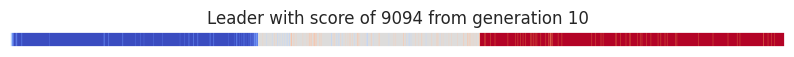

<Figure size 1020x400 with 0 Axes>

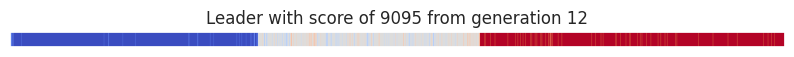

<Figure size 1020x400 with 0 Axes>

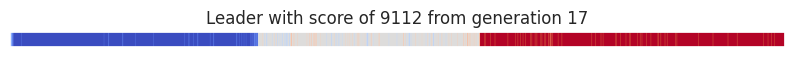

<Figure size 1020x400 with 0 Axes>

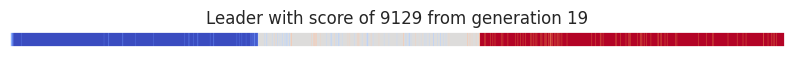

================================ generation: 20 ================================


<Figure size 1020x400 with 0 Axes>

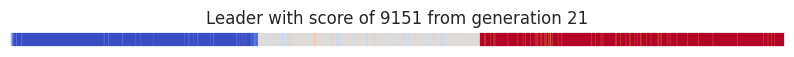

================================ generation: 30 ================================
================================ generation: 40 ================================


<Figure size 1020x400 with 0 Axes>

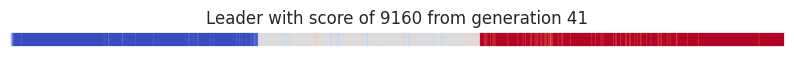

================================ generation: 50 ================================
================================ generation: 60 ================================
================================ generation: 70 ================================
================================ generation: 80 ================================
================================ generation: 90 ================================
================================ generation: 100 ================================
leader: [1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 

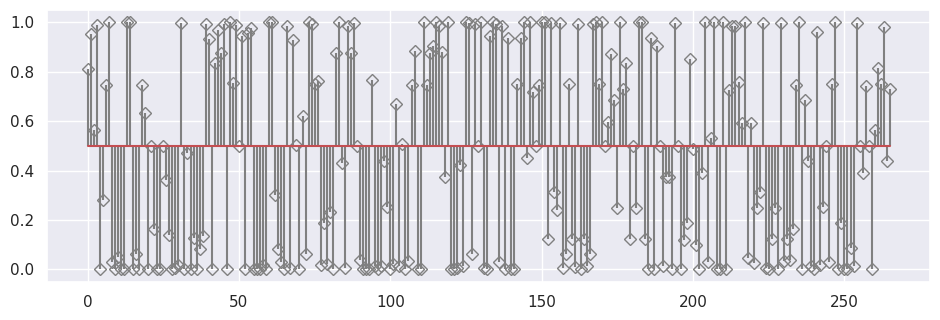

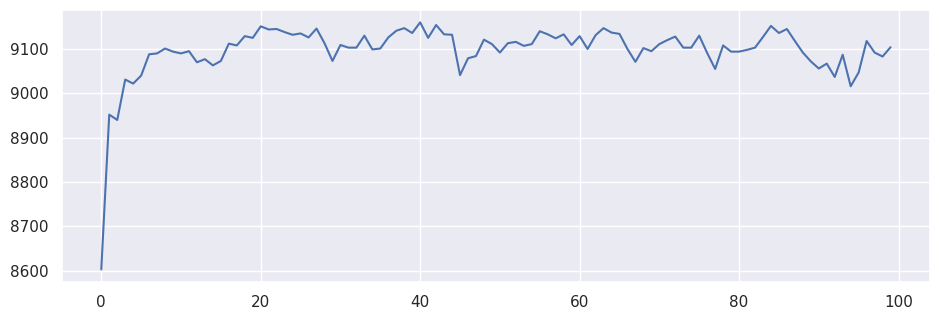

<Figure size 1020x400 with 0 Axes>

In [7]:
lr05_mr025_shift05 = train(size = 128, lr = 0.5, mr = 0.25, shift = 0.5)

================================ generation: 10 ================================


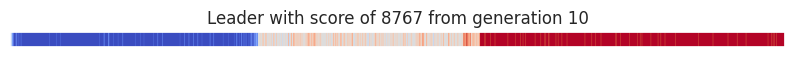

<Figure size 1020x400 with 0 Axes>

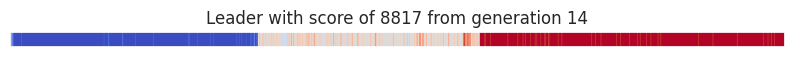

<Figure size 1020x400 with 0 Axes>

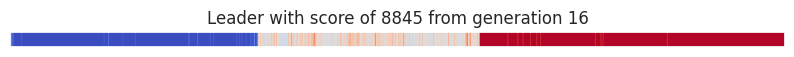

<Figure size 1020x400 with 0 Axes>

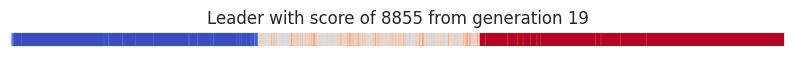

================================ generation: 20 ================================


<Figure size 1020x400 with 0 Axes>

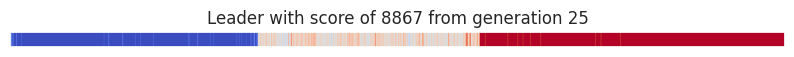

================================ generation: 30 ================================


<Figure size 1020x400 with 0 Axes>

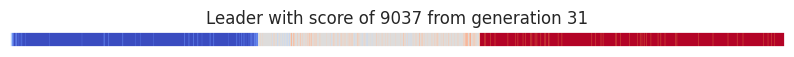

================================ generation: 40 ================================
================================ generation: 50 ================================
================================ generation: 60 ================================
================================ generation: 70 ================================


<Figure size 1020x400 with 0 Axes>

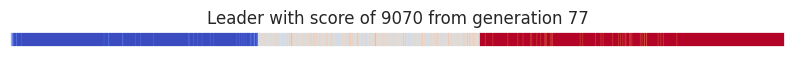

================================ generation: 80 ================================
================================ generation: 90 ================================
================================ generation: 100 ================================
leader: [1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1]


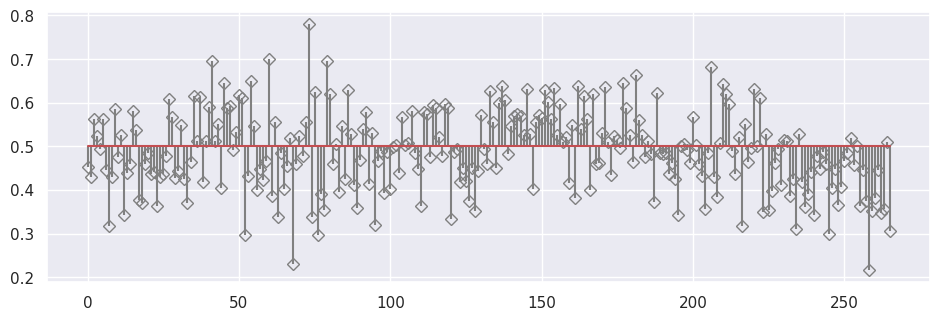

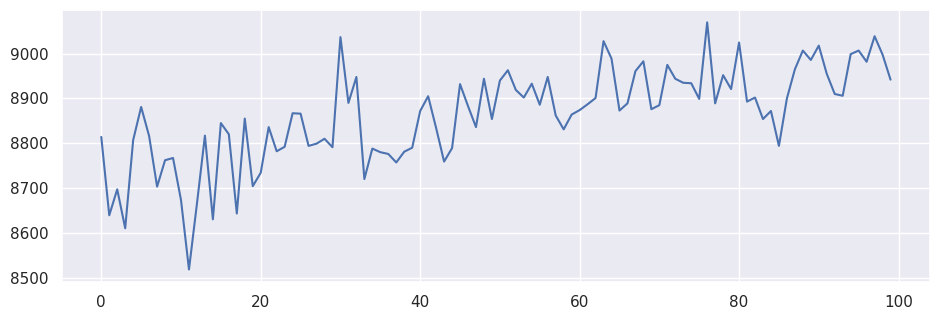

<Figure size 1020x400 with 0 Axes>

In [8]:
lr001_mr025_shift005 = train(size = 128, lr = 0.01, mr = 0.25, shift = 0.05)

================================ generation: 10 ================================


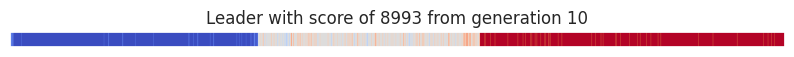

================================ generation: 20 ================================


<Figure size 1020x400 with 0 Axes>

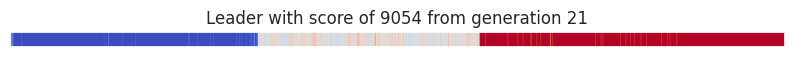

<Figure size 1020x400 with 0 Axes>

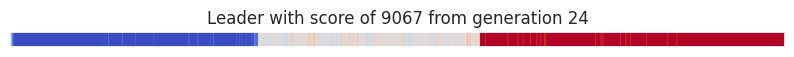

<Figure size 1020x400 with 0 Axes>

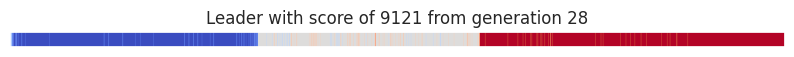

================================ generation: 30 ================================
================================ generation: 40 ================================


<Figure size 1020x400 with 0 Axes>

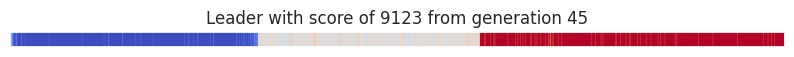

================================ generation: 50 ================================


<Figure size 1020x400 with 0 Axes>

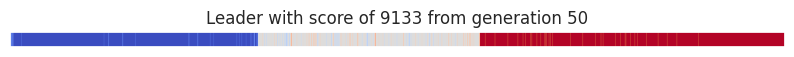

<Figure size 1020x400 with 0 Axes>

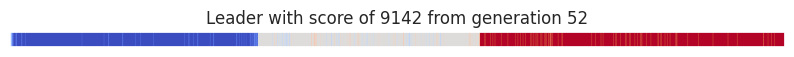

<Figure size 1020x400 with 0 Axes>

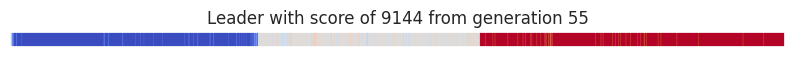

================================ generation: 60 ================================
================================ generation: 70 ================================
================================ generation: 80 ================================
================================ generation: 90 ================================


<Figure size 1020x400 with 0 Axes>

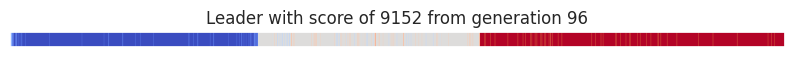

================================ generation: 100 ================================
leader: [0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0]


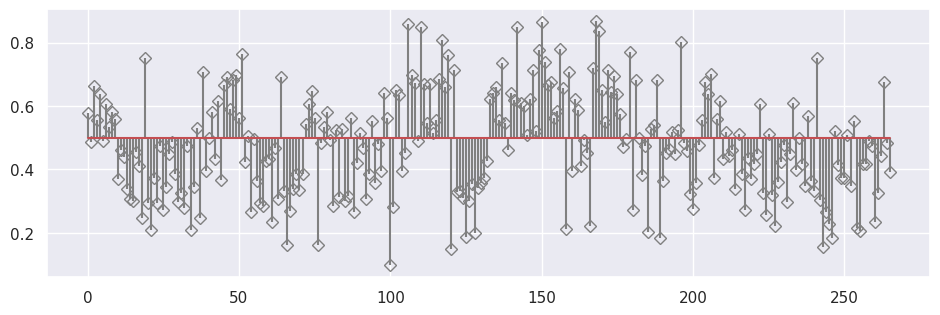

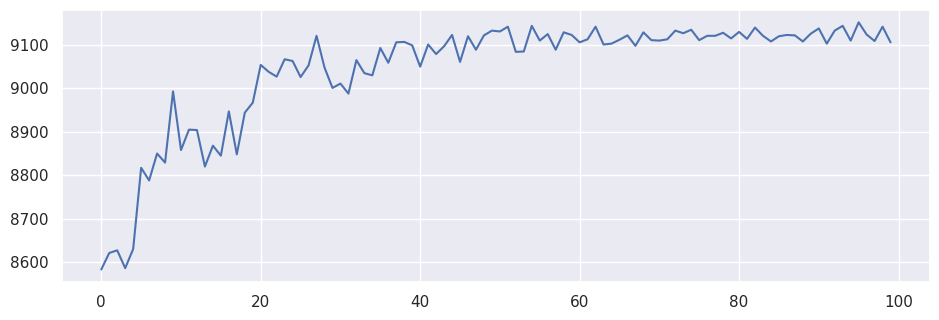

<Figure size 1020x400 with 0 Axes>

In [9]:
lr005_mr05_shift005 = train(size = 128, lr = 0.05, mr = 0.5, shift = 0.05)

================================ generation: 10 ================================


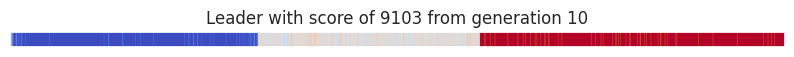

<Figure size 1020x400 with 0 Axes>

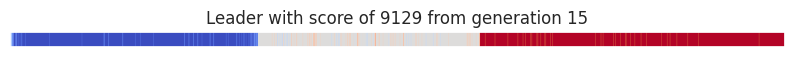

<Figure size 1020x400 with 0 Axes>

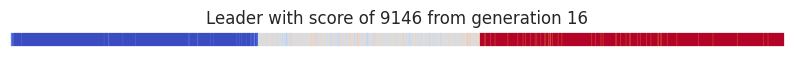

================================ generation: 20 ================================


<Figure size 1020x400 with 0 Axes>

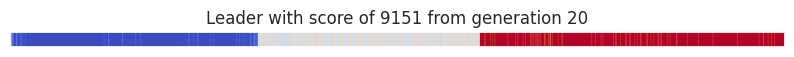

<Figure size 1020x400 with 0 Axes>

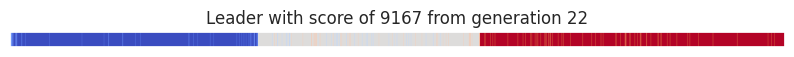

================================ generation: 30 ================================
================================ generation: 40 ================================


<Figure size 1020x400 with 0 Axes>

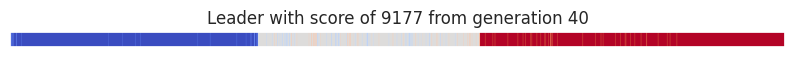

================================ generation: 50 ================================
================================ generation: 60 ================================


<Figure size 1020x400 with 0 Axes>

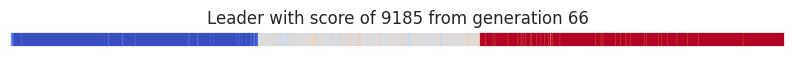

================================ generation: 70 ================================
================================ generation: 80 ================================
================================ generation: 90 ================================
================================ generation: 100 ================================
leader: [0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 1]


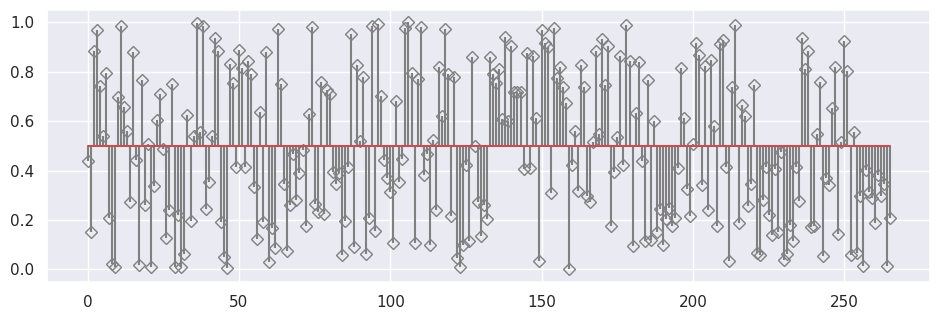

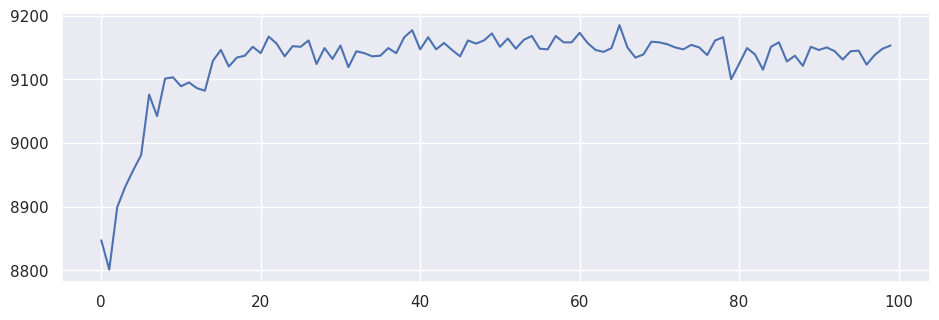

<Figure size 1020x400 with 0 Axes>

In [10]:
lr025_mr05_shift015 = train(size = 128, lr = 0.25, mr = 0.5, shift = 0.15)